## Compare detected face locations in different pliers face detection methods


### Tools that detect faces:

* Google Cloud Vision API
* Clarifai
* pliers itself


### Common measures
* boundaries of faces


### Ways to assess similarity
* Eucledian distance between coordinates?

In [1]:
import numpy as np
from os.path import join as opj
from pliers.extractors import (ClarifaiAPIImageExtractor,
                               FaceRecognitionFaceLocationsExtractor, 
                               GoogleVisionAPIFaceExtractor,
                               merge_results)
from pliers.stimuli import ImageStim
from pliers.filters import FrameSamplingFilter

from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from matplotlib import patches as patches

W0808 10:31:18.485033 140736167261056 warnings.py:110] /Users/Mai/anaconda/envs/neuroscout/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])

W0808 10:31:18.486621 140736167261056 warnings.py:110] /Users/Mai/anaconda/envs/neuroscout/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])

W0808 10:31:18.487856 140736167261056 warnings.py:110] /Users/Mai/anaconda/envs/neuroscout/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is 

In [71]:
def plot_boundingBox(img, rect_coords, savename='', title=''):
    fig,ax = plt.subplots(1)
    
    if isinstance(img, str):
        img = mpimg.imread(img)
    
    imgplot = ax.imshow(img)

    # add bounding boxes
    for c in rect_coords:
        rect = patches.Rectangle((c[0], c[1]), c[2], c[3],
                             linewidth=2,
                             edgecolor='r',
                             facecolor='none',
                            )
        ax.add_patch(rect)

    # turn off axis    
    plt.axis('off')
    
    plt.title(title)
    
    # save
    if not savename:
        plt.show()
    else:
        plt.savefig(savename)

In [3]:
# awful hardcoded path to a test image
img_pth = opj('../', 'data', 'obama.jpg')
stim = ImageStim(img_pth)


In [4]:
# the results of the face detection are given relative to stimulus size. Let's get the image dimensions in pixel
y, x = stim.data.shape[:2]
print(f'the picture is {x} pixel x {y} pixel in size')

the picture is 444 pixel x 600 pixel in size


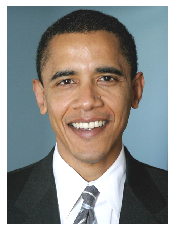

In [6]:
# let's also see what the picture looks like
fig,ax = plt.subplots(1)
plt_img = mpimg.imread(img_pth)
imgplot = ax.imshow(plt_img)

plt.axis('off')
plt.show()


### pliers face detection

In [101]:
ext_pliers = FaceRecognitionFaceLocationsExtractor()
result_pliers = ext_pliers.transform(stim).to_df()
top, right, bottom, left = result_pliers['face_locations'][0]
print(top, right, bottom, left)

142 349 409 82


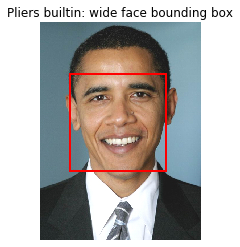

In [102]:
# Plot bounding on image 
coords_pliers = [[left, top, box_width, box_height]]
plot_boundingBox(img_pth, coords_pliers, title='Pliers builtin: wide face bounding box')


### clarifai face detection

In [103]:
# the clarifai extraction needs a model and an api key
model='face' 
ext_clarifai = ClarifaiAPIImageExtractor(api_key='d53d5755b7514b87877df990f2d0bbd4',
                                         model=model)
result_clarifai = ext_clarifai.transform(stim).to_df()


In [104]:
print(result_clarifai)

   order  duration  onset  object_id   top_row  left_col  bottom_row  \
0    NaN       NaN    NaN          0  0.118024  0.220802    0.717073   

   right_col  
0   0.788294  


In [77]:
# transform relative coordinates into pixel
top_row = y * result_clarifai['top_row'][0]
bottom_row = y * result_clarifai['bottom_row'][0]
left_col = x * result_clarifai['left_col'][0]
right_col = x * result_clarifai['right_col'][0]
print(top_row, right_col, bottom_row, left_col)

70.81428319215775 350.0025701522827 430.2435636520386 98.0360192656517


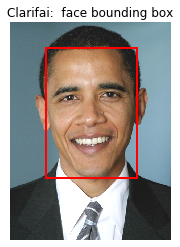

In [105]:
# Plot bounding on image 
box_width = right_col - left_col
box_height = bottom_row - top_row
coords_clarifai = [[left_col, top_row, box_width, box_height]]
plot_boundingBox(img_pth, coords_clarifai, title='Clarifai:  face bounding box')

### Google Cloud vision API face detection

In [34]:
#ext_google = GoogleVisionAPIFaceExtractor(discovery_file='/home/adina/NeuroHackademy-02c15db15c2a.json')
ext_google = GoogleVisionAPIFaceExtractor(discovery_file='/Users/Mai/NeuroHackademy-02c15db15c2a.json')
result_google = ext_google.transform(stim).to_df()

W0808 10:39:40.744380 140736167261056 __init__.py:44] file_cache is unavailable when using oauth2client >= 4.0.0 or google-auth
Traceback (most recent call last):
  File "/Users/Mai/anaconda/envs/neuroscout/lib/python3.7/site-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/Mai/anaconda/envs/neuroscout/lib/python3.7/site-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/Mai/anaconda/envs/neuroscout/lib/python3.7/site-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in

In [51]:
result_google

,order,duration,onset,object_id,boundingPoly_vertex1_x,boundingPoly_vertex1_y,boundingPoly_vertex2_x,boundingPoly_vertex2_y,boundingPoly_vertex3_x,boundingPoly_vertex3_y,...,tiltAngle,face_detectionConfidence,face_landmarkingConfidence,joyLikelihood,sorrowLikelihood,angerLikelihood,surpriseLikelihood,underExposedLikelihood,blurredLikelihood,headwearLikelihood
0,NaN,NaN,NaN,0,34,3,413,3,413,444,...,-2.058331,0.999946,0.84057,VERY_LIKELY,VERY_UNLIKELY,VERY_UNLIKELY,VERY_UNLIKELY,VERY_UNLIKELY,VERY_UNLIKELY,VERY_UNLIKELY


In [109]:
# Google has "wide" and "narrow" bounding boxes. Here we get the wide bounding box

result_google.to_dict(orient='records')
# vertex coordinates are in the same scale as the original image.
# vertices are in order top-left, top-right, bottom-right, bottom-left.
top_left_x = result_google['boundingPoly_vertex1_x'][0]
top_right_x = result_google['boundingPoly_vertex2_x'][0]
bottom_right_x = result_google['boundingPoly_vertex3_x'][0]
bottom_left_x = result_google['boundingPoly_vertex4_x'][0]

top_left_y = result_google['boundingPoly_vertex1_y'][0]
top_right_y = result_google['boundingPoly_vertex2_y'][0]
bottom_right_y = result_google['boundingPoly_vertex3_y'][0]
bottom_left_y = result_google['boundingPoly_vertex4_y'][0]

print(top_left_x, top_right_x, bottom_right_x, bottom_left_x)
print(top_left_y, top_right_y, bottom_right_y, bottom_left_y)

34 413 413 34
3 3 444 444


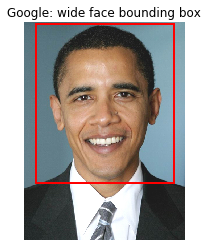

In [112]:
# # Plot bounding on image 
box_width = bottom_right_x - bottom_left_x
box_height =  bottom_right_y - top_right_y
coords_google_wide = [[bottom_left_x, top_left_y, box_width, box_height]]

plot_boundingBox(img_pth, coords_google_wide, title='Google: wide face bounding box')

In [59]:
coords_google_wide

[[34, 444, 379, 441]]

In [114]:
# Google has "wide" and "narrow" bounding boxes. Here we get the narrow bounding box

result_google.to_dict(orient='records')
# vertex coordinates are in the same scale as the original image.
# vertices are in order top-left, top-right, bottom-right, bottom-left.
top_left_x = result_google['fdBoundingPoly_vertex1_x'][0]
top_right_x = result_google['fdBoundingPoly_vertex2_x'][0]
bottom_right_x = result_google['fdBoundingPoly_vertex3_x'][0]
bottom_left_x = result_google['fdBoundingPoly_vertex4_x'][0]

top_left_y = result_google['fdBoundingPoly_vertex1_y'][0]
top_right_y = result_google['fdBoundingPoly_vertex2_y'][0]
bottom_right_y = result_google['fdBoundingPoly_vertex3_y'][0]
bottom_left_y = result_google['fdBoundingPoly_vertex4_y'][0]

print(top_left_x, top_right_x, bottom_right_x, bottom_left_x)
print(top_left_y, top_right_y, bottom_right_y, bottom_left_y)

81 367 367 81
112 112 397 397


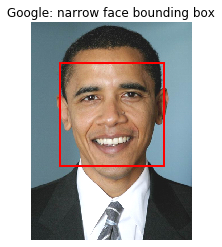

In [115]:

# Plot bounding on image 
box_width = bottom_right_x - bottom_left_x
box_height =  bottom_right_y - top_right_y
coords_google_narrow = [[bottom_left_x, top_left_y, box_width, box_height]]
plot_boundingBox(img_pth, coords_google_narrow, title = 'Google: narrow face bounding box')


### Compare different face bounding boxes

In [116]:
# let's start with looking at the coords
print('pliers: ' + str(coords_pliers))
print('clarifai: ' + str(coords_clarifai))
print('google (wide): ' + str(coords_google_wide))
print('google (narrow): ' + str(coords_google_narrow))

pliers: [[82, 142, 267, 267]]
clarifai: [[98.0360192656517, 70.81428319215775, 251.966550886631, 359.42928045988083]]
google (wide): [[34, 3, 379, 441]]
google (narrow): [[81, 112, 286, 285]]


In [121]:
# Plot on the same figure

# Make a dictionary with coords
face_apis = ['pliers', 'clarifai', 'google_wide', 'google_narrow']
coord_dict = dict(zip(face_apis, [coords_pliers, coords_clarifai, coords_google_wide, coords_google_narrow]))


[[82, 142, 267, 267]]

### Detect faces in a video

In [ ]:
# Path to video
video_pth = opj('../', 'data', 'obama_speech.mp4')

# Sample 2 frames per second
sampler = FrameSamplingFilter(hertz=2)
frames = sampler.transform(video_pth)


In [ ]:
# Extract using google API
ext_google = GoogleVisionAPIFaceExtractor(discovery_file='/Users/Mai/NeuroHackademy-02c15db15c2a.json')
results_google = ext_google.transform(frames)
results_google = merge_results(results_google, )


In [ ]:
# get coordinates of the bounding box
# top_left_x = results_google['GoogleVisionAPIFaceExtractor#fdBoundingPoly_vertex1_x']
# top_right_x = results_google['GoogleVisionAPIFaceExtractor#fdBoundingPoly_vertex2_x']
# bottom_left_x = results_google['GoogleVisionAPIFaceExtractor#fdBoundingPoly_vertex3_x']
# bottom_right_x = results_google['GoogleVisionAPIFaceExtractor#fdBoundingPoly_vertex4_x']

# top_left_y = results_google['GoogleVisionAPIFaceExtractor#fdBoundingPoly_vertex1_y']
# top_right_y = results_google['GoogleVisionAPIFaceExtractor#fdBoundingPoly_vertex2_y']
# bottom_left_y = results_google['GoogleVisionAPIFaceExtractor#fdBoundingPoly_vertex3_y']
# bottom_right_y = results_google['GoogleVisionAPIFaceExtractor#fdBoundingPoly_vertex4_y']



In [ ]:
#for i in frames.n_frames:
out_dir = opj('../', 'output')

for i in range(frames.n_frames):
    # get this frame
    f = frames.get_frame(i)
    f_data = f.data
    f_name = f.name

    # get api output for this frame
    f_results_google = results_google.loc[df['stim_name'] == f_name]

    # get bounding box
    coords = []
    for index, row in f_results_google.iterrows():
        coords.append(get_faceBounds_google(row))

    # plot img with box and save    
    savename = opj(out_dir, 'img_' + str(i) + '.jpg')
    plot_boundingBox(f_data, coords, savename)



In [ ]:
s = 'b'
if not s:
    print('b')
else:
    print('c')

In [ ]:
def get_faceBounds_google(df, boxtype='tight'):
    if boxtype is 'tight':    
        top_left_x = df['GoogleVisionAPIFaceExtractor#fdBoundingPoly_vertex1_x']
        top_right_x = df['GoogleVisionAPIFaceExtractor#fdBoundingPoly_vertex2_x']
        bottom_left_x = df['GoogleVisionAPIFaceExtractor#fdBoundingPoly_vertex3_x']
        bottom_right_x = df['GoogleVisionAPIFaceExtractor#fdBoundingPoly_vertex4_x']

        top_left_y = df['GoogleVisionAPIFaceExtractor#fdBoundingPoly_vertex1_y']
        top_right_y = df['GoogleVisionAPIFaceExtractor#fdBoundingPoly_vertex2_y']
        bottom_left_y = df['GoogleVisionAPIFaceExtractor#fdBoundingPoly_vertex3_y']
        bottom_right_y = df['GoogleVisionAPIFaceExtractor#fdBoundingPoly_vertex4_y']
        
    elif boxtype is 'wide':
        top_left_x = df['GoogleVisionAPIFaceExtractor#boundingPoly_vertex1_x']
        top_right_x = df['GoogleVisionAPIFaceExtractor#boundingPoly_vertex2_x']
        bottom_left_x = df['GoogleVisionAPIFaceExtractor#boundingPoly_vertex3_x']
        bottom_right_x = df['GoogleVisionAPIFaceExtractor#boundingPoly_vertex4_x']

        top_left_y = df['GoogleVisionAPIFaceExtractor#boundingPoly_vertex1_y']
        top_right_y = df['GoogleVisionAPIFaceExtractor#boundingPoly_vertex2_y']
        bottom_left_y = df['GoogleVisionAPIFaceExtractor#boundingPoly_vertex3_y']
        bottom_right_y = df['GoogleVisionAPIFaceExtractor#boundingPoly_vertex4_y']
    
    coords = [bottom_left_x, bottom_left_y, bottom_right_x - bottom_left_x, top_right_y - bottom_right_y]
    return coords

In [ ]:
f_results_google.keys()

In [ ]:
len(top_left_x)
frames.get_frame(10).data

In [ ]:
num_unique_faces = np.unique(results_google['object_id'])



In [ ]:
unique(results_google['object_id'])

In [ ]:
df_face1 = results_google.loc[df['object_id'] == 0]
results_google